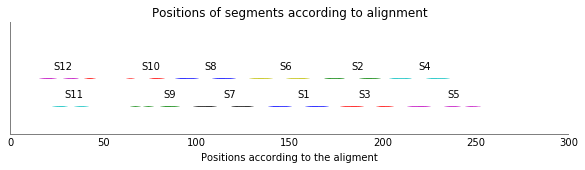

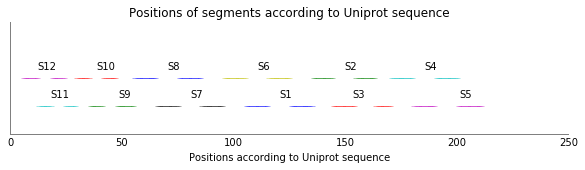

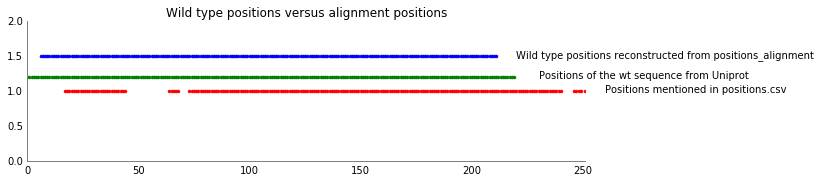

In [3]:
%run "ks01_Data_import.ipynb"

### Parsing a PDB file

In [4]:
pdb_code = "HIS3_saccharomyces_cerevisiae__swissmodel_prediction"
pdb_file = "files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb" 
structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_file)
model = structure[0]

### Plotting distances

In [ ]:
def calc_residue_dist(residue_one, residue_two):
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return np.sqrt(np.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain_one, chain_two):
    """Returns a matrix of C-alpha distances between two chains"""
    answer = np.zeros((len(chain_one), len(chain_two)), np.float)
    for row, residue_one in enumerate(chain_one):
        for col, residue_two in enumerate(chain_two) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer

def calc_dist_matrix_for_subsets(chain_one, chain_two, chain_one_subset, chain_two_subset):
    dist_matrix = np.zeros((len(chain_one), len(chain_two)), np.float)
    for row, residue_one in enumerate(chain_one):
        for col, residue_two in enumerate(chain_two):
            if row < chain_one_subset[1] and row > chain_one_subset[0]:
                if col < chain_two_subset[1] and col > chain_two_subset[0]:
                    dist_matrix[row, col] = calc_residue_dist(residue_one, residue_two)
    return dist_matrix

def calc_dist_matrix_for_subsets(chain, subset_one, subset_two):
    dist_matrix = np.zeros((len(chain), len(chain)), np.float)
    for row, residue_one in enumerate(chain):
        for col, residue_two in enumerate(chain):
            if row in subset_one and col in subset_two:
                    dist_matrix[row, col] = calc_residue_dist(residue_one, residue_two)
    return dist_matrix

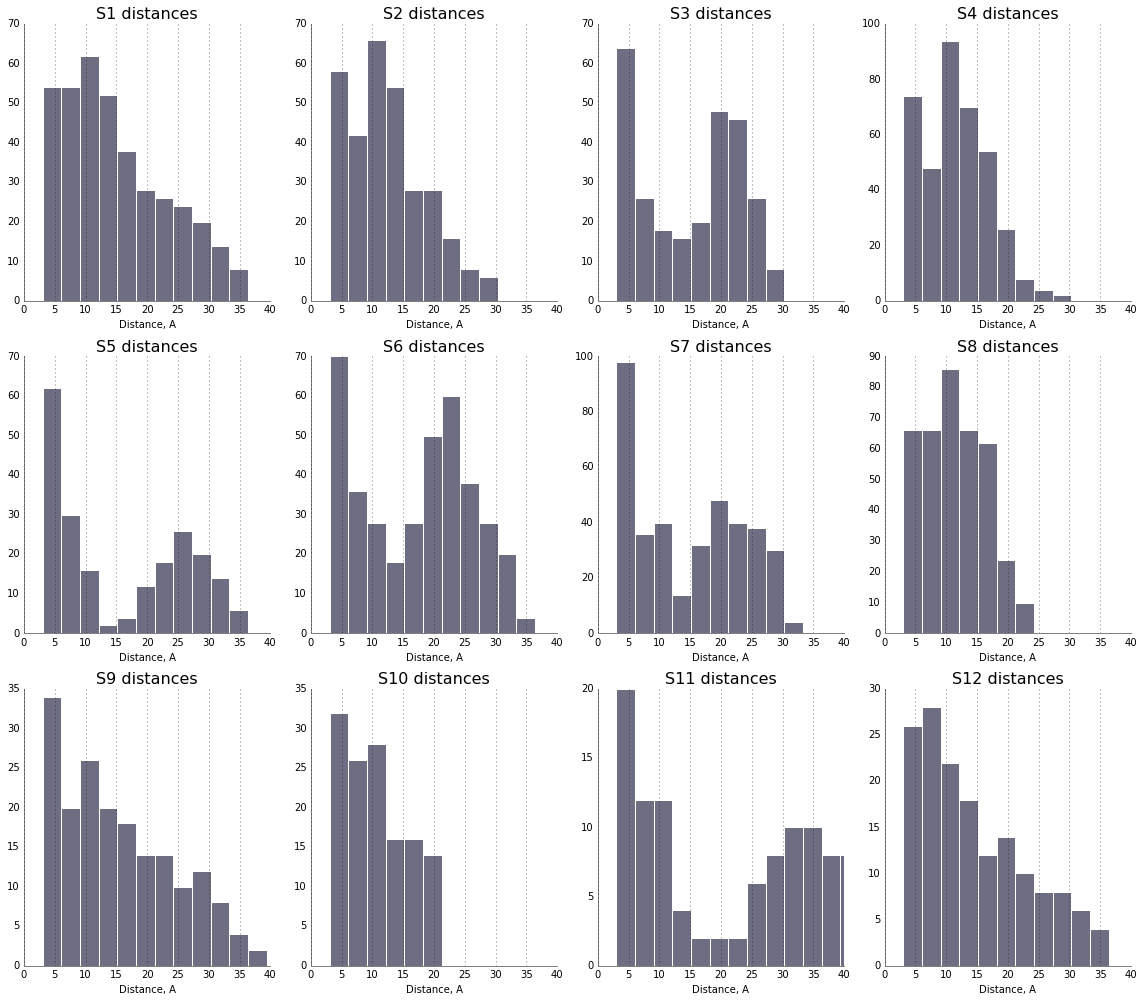

In [25]:
plot_better(width=16, height=14)
title = 'Distribution of distances\nbetween all pairs of mutated residues within a segment'

for index, segment_name in enumerate(segment_names):
    segment_seq = [positions[positions.segment == segment_name].wt1.values[0], positions[positions.segment == segment_name].wt2.values[0]]
    try:
        start1 = Scer_Uniprot.index(segment_seq[0])
        len1 = len(segment_seq[0])
        start2 = Scer_Uniprot.index(segment_seq[1])
        len2 = len(segment_seq[1])
        segment_positions = range(start1, start1 + len1) + range(start2, start2 + len2)
    except ValueError:
        print 'Shit happened with segment %s!\n(sequence is %s)' %(segment_name, segment_seq)
        continue
    distances = calc_dist_matrix_for_subsets(model["A"], segment_positions, segment_positions).flatten()
    distances = [e for e in distances if e > 0]
    
    ax = plt.subplot(len(segment_names)/4, 4, index+1)
    plt.title(segment_name + ' distances', fontsize=16)
    plt.hist(distances, edgecolor='white', color=bar_color, range=(0,100), bins=33)
    plt.xlim(0,40)
    plt.xlabel('Distance, A')
    improve_plot(ax, grid='x')
# plt.suptitle(title, fontsize=14)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

### Calculating half-sphere exposure

In [27]:
from Bio.PDB import HSExposure, ExposureCN, HSExposureCA, HSExposureCB, is_aa
radius = 12.
hse=HSExposureCA(model, radius=radius)
hse=HSExposureCB(model, radius=radius)
hse=ExposureCN(model, radius=radius)

In [28]:
hse_a_ups = []
hse_a_downs = []
counter = 0
for r in model['A'].get_residues():
    if is_aa(r):
        counter += 1
        try:
            hse_a_ups.append(r.xtra["EXP_HSE_A_U"])
            hse_a_downs.append(r.xtra["EXP_HSE_A_D"])
        except:
            pass
hse_a_ups = np.array(hse_a_ups)
hse_a_downs = np.array(hse_a_downs)
print counter

205


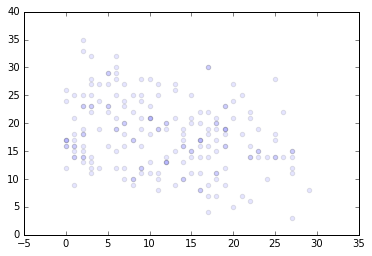

In [94]:
plt.scatter(hse_a_ups, hse_a_downs, alpha=0.1)

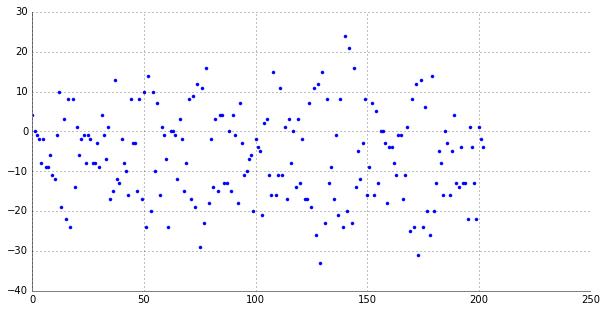

In [103]:
plot_better()
plt.plot(hse_a_ups-hse_a_downs, '.')

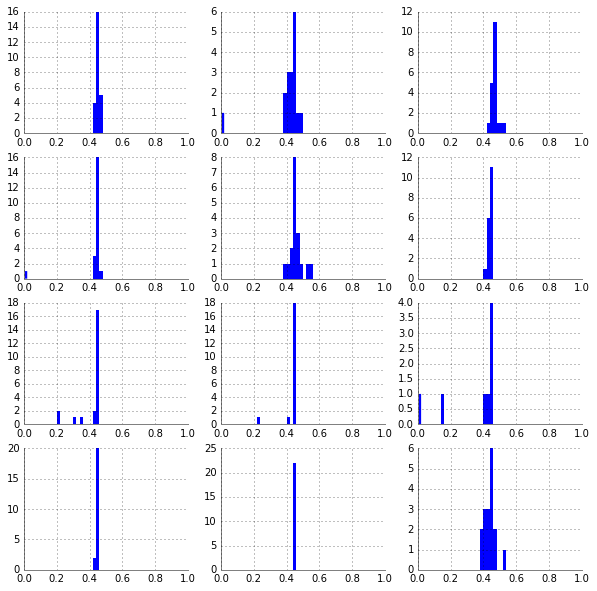

In [6]:
plot_better(width=10, height=10)
counter = 1
for segment_name, segment_data in data_singles.items():
    ax = plt.subplot(4,3,counter)
    plt.hist(data_singles[segment_name].s.values, edgecolor='none', range=(0,1), bins=50)
    counter += 1
    improve_plot(ax)

In [54]:
def get_hse(residues_dict, mutation_Dinara_style):
    position_alignment = int(mutation_Dinara_style[:-1])
#     position_wt = get_wt_position(position_alignment)
    print position_alignment, position_wt
    try:
        residue = residues_dict[(' ', position_wt, ' ')]
        hse_up = residue.xtra["EXP_HSE_A_U"]
        hse_down = residue.xtra["EXP_HSE_A_D"]
        return {'hse_up':hse_up, 'hse_down':hse_down}
    except:
#         print mutation_Dinara_style
#         print residue, hse_up, hse_down
        return {'hse_up':None, 'hse_down':None}

singles = data_singles.values()[0].copy()
residues = model['A'].child_dict
singles['hse_up'] = singles.mut_list.apply(lambda s: get_hse(residues, s)['hse_up'])
singles['hse_down'] = singles.mut_list.apply(lambda s: get_hse(residues, s)['hse_down'])
singles['hse_up']

0 0
2 0
5 0
5 0
6 0
8 0
8 0
9 0
9 0
29 18
25 14
9 0
6 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
2 0
2 0
0 0
0 0
0 0
2 0
5 0
5 0
6 0
8 0
8 0
9 0
9 0
29 18
25 14
9 0
6 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
2 0
2 0
0 0
0 0
